In [1]:
%pylab inline
import numpy as np
from scipy import stats
import pymc3 as pm
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = np.random.randn(100)

In [3]:
with pm.Model() as model: 
    mu = pm.Normal('mu', mu=0, sd=1, testval=0)
    sd = pm.HalfNormal('sd', sd=1)
    n = pm.Normal('n', mu=mu, sd=sd, observed=data)

Applied log-transform to sd and added transformed sd_log_ to model.


In [4]:
means, sds, elbos = pm.variational.advi(model=model, n=20000, accurate_elbo=True)

Iteration 0 [0%]: ELBO = -1014.44
Iteration 2000 [10%]: Average ELBO = -431.42
Iteration 4000 [20%]: Average ELBO = -168.89
Iteration 6000 [30%]: Average ELBO = -150.1
Iteration 8000 [40%]: Average ELBO = -145.45
Iteration 10000 [50%]: Average ELBO = -144.8
Iteration 12000 [60%]: Average ELBO = -144.79
Iteration 14000 [70%]: Average ELBO = -144.79
Iteration 16000 [80%]: Average ELBO = -144.79
Iteration 18000 [90%]: Average ELBO = -144.78
Finished [100%]: Average ELBO = -144.79


In [5]:
with model:
    step = pm.NUTS()
    trace = pm.sample(500, step)

ERROR (theano.gof.opt): Optimization failure due to: LocalOptGroup(use_c_ger,use_c_gemv)
ERROR (theano.gof.opt): node: Gemv{no_inplace}(AllocEmpty{dtype='float64'}.0, TensorConstant{1.0}, Elemwise{mul,no_inplace}.0, p0, TensorConstant{0.0})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/Users/fonnescj/anaconda3/lib/python3.5/configparser.py", line 1135, in _unify_values
    sectiondict = self._sections[section]
KeyError: 'blas'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/fonnescj/anaconda3/lib/python3.5/site-packages/theano/configparser.py", line 166, in fetch_val_for_key
    return theano_cfg.get(section, option)
  File "/Users/fonnescj/anaconda3/lib/python3.5/configparser.py", line 778, in get
    d = self._unify_values(section, vars)
  File "/Users/fonnescj/anaconda3/lib/python3.5/configparser.py", line 1138, in _unify_values
    raise NoSectionError(se

In [7]:
print(trace['mu'].mean())
print(trace['sd'].mean())
print(trace['mu'].std())
print(trace['sd'].std())

0.00376012516438
0.993383985109
0.101307131759
0.0663708862884


/Users/fonnescj/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


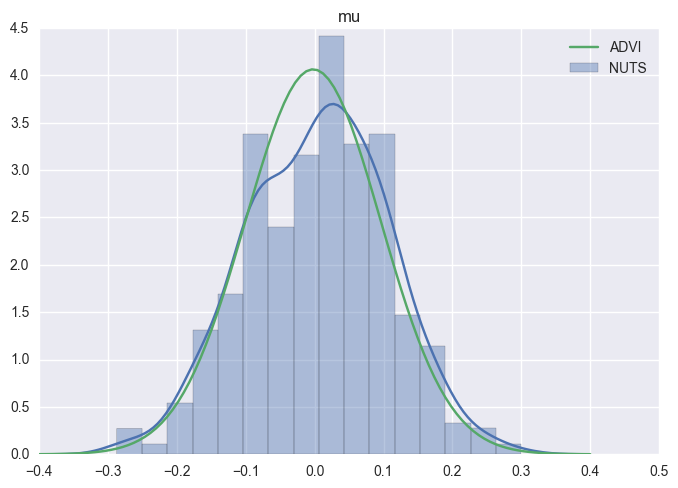

In [8]:
ax = sns.distplot(trace['mu'], label='NUTS')
xlim = ax.get_xlim()
x = np.linspace(xlim[0], xlim[1], 100)
y = stats.norm(means['mu'], sds['mu']).pdf(x)
ax.plot(x, y, label='ADVI')
ax.set_title('mu')
ax.legend(loc=0)

/Users/fonnescj/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


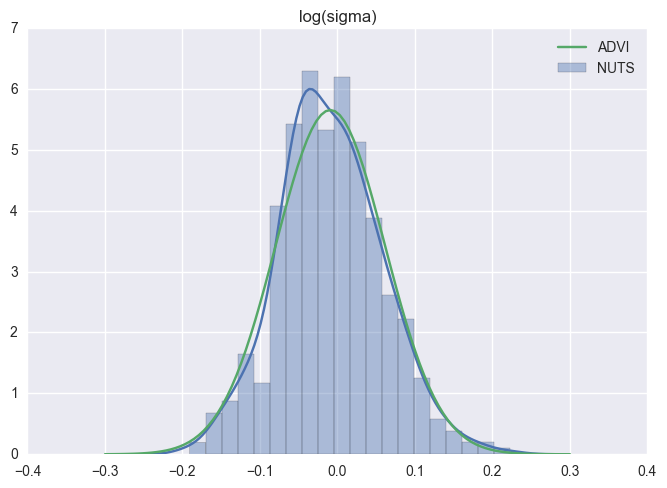

In [12]:
ax = sns.distplot(trace['sd_log_'], label='NUTS')
xlim = ax.get_xlim()
x = np.linspace(xlim[0], xlim[1], 100)
y = stats.norm(means['sd_log_'], sds['sd_log_']).pdf(x)
ax.plot(x, y, label='ADVI')
ax.set_title('log(sigma)')
ax.legend(loc=0)

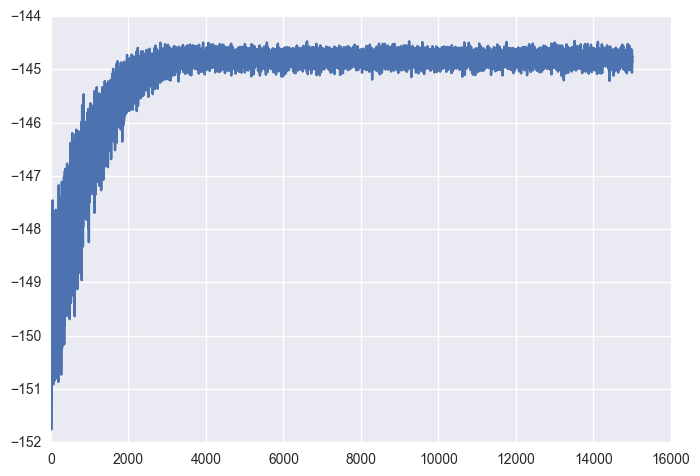

In [13]:
sns.plt.plot(elbos[5000:])